# Project 6: SPICE Simulation

In [1]:
from vpython import *
import numpy as np
%matplotlib ipympl
import random
from math import sin, e , pi
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## RC Filter

In [2]:
class rc_circuit:
    def __init__(self,deltat, resistance,capacitance):
        self.deltat = deltat
        self.v_i = 0.0
        self.resistance = resistance
        self.capacitance = capacitance
        self.v_a = 0.0
        self.v_b = 0.0
        self.i_eq = 0.0
        self.i_vi = 0.0
        rq = 1.0 / self.resistance
        self.a = np.array([[-rq,rq,1],[rq,(-rq)-(self.capacitance/self.deltat),0],[1,0,0]])
        self.b = np.array([0.0,0.0,0.0])
    def update_circuit(self,voltage):
        self.v_i = voltage
        self.v_a = voltage
        holder = - (self.capacitance  * self.v_b)/self.deltat
        self.i_eq = holder
        holder = 0.0
        self.b[1] = self.i_eq
        self.b[2] = self.v_i

        self.x = np.dot(np.linalg.inv(self.a),self.b)
        self.v_a = self.x[0]
        self.v_b = self.x[1]
        
        self.i_vi = self.x[2]
        

In [3]:
scene = canvas()
time = 0 
resistance = 1000.0
capacitance = 0.0000001
deltat = 0.000001
w = 2 * pi * 1000
circuit = rc_circuit(deltat,resistance,capacitance)
voltage = 5 * sin(w * time)
graph1 = graph(title = "R/C Circuit",ytitle = "voltage/milliamps",xtitle = "time [s]",height = 300)
g1 = gcurve(color = color.blue,label = "Vb")
g2 = gcurve(color = color.red, label = "Va")
g3 = gcurve(color = color.green, label = "IVi")
while (time < 0.003):
    voltage = 5.0 * sin(w *time)
    circuit.update_circuit(voltage)
    g2.plot(pos=[time,circuit.v_a])
    g1.plot(pos=[time,circuit.v_b])
    g3.plot(pos=[time,circuit.i_vi*1000])
    time = time + deltat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For this simulation the frequency is 1000 hz. The Resistance is 1000 ohms, the capacitance is 100 nanofarads. My simulation runs for 3 milliseconds and my dt is 1 microsecond. From the screenshot below you can see that my simulation matches LTSpice.
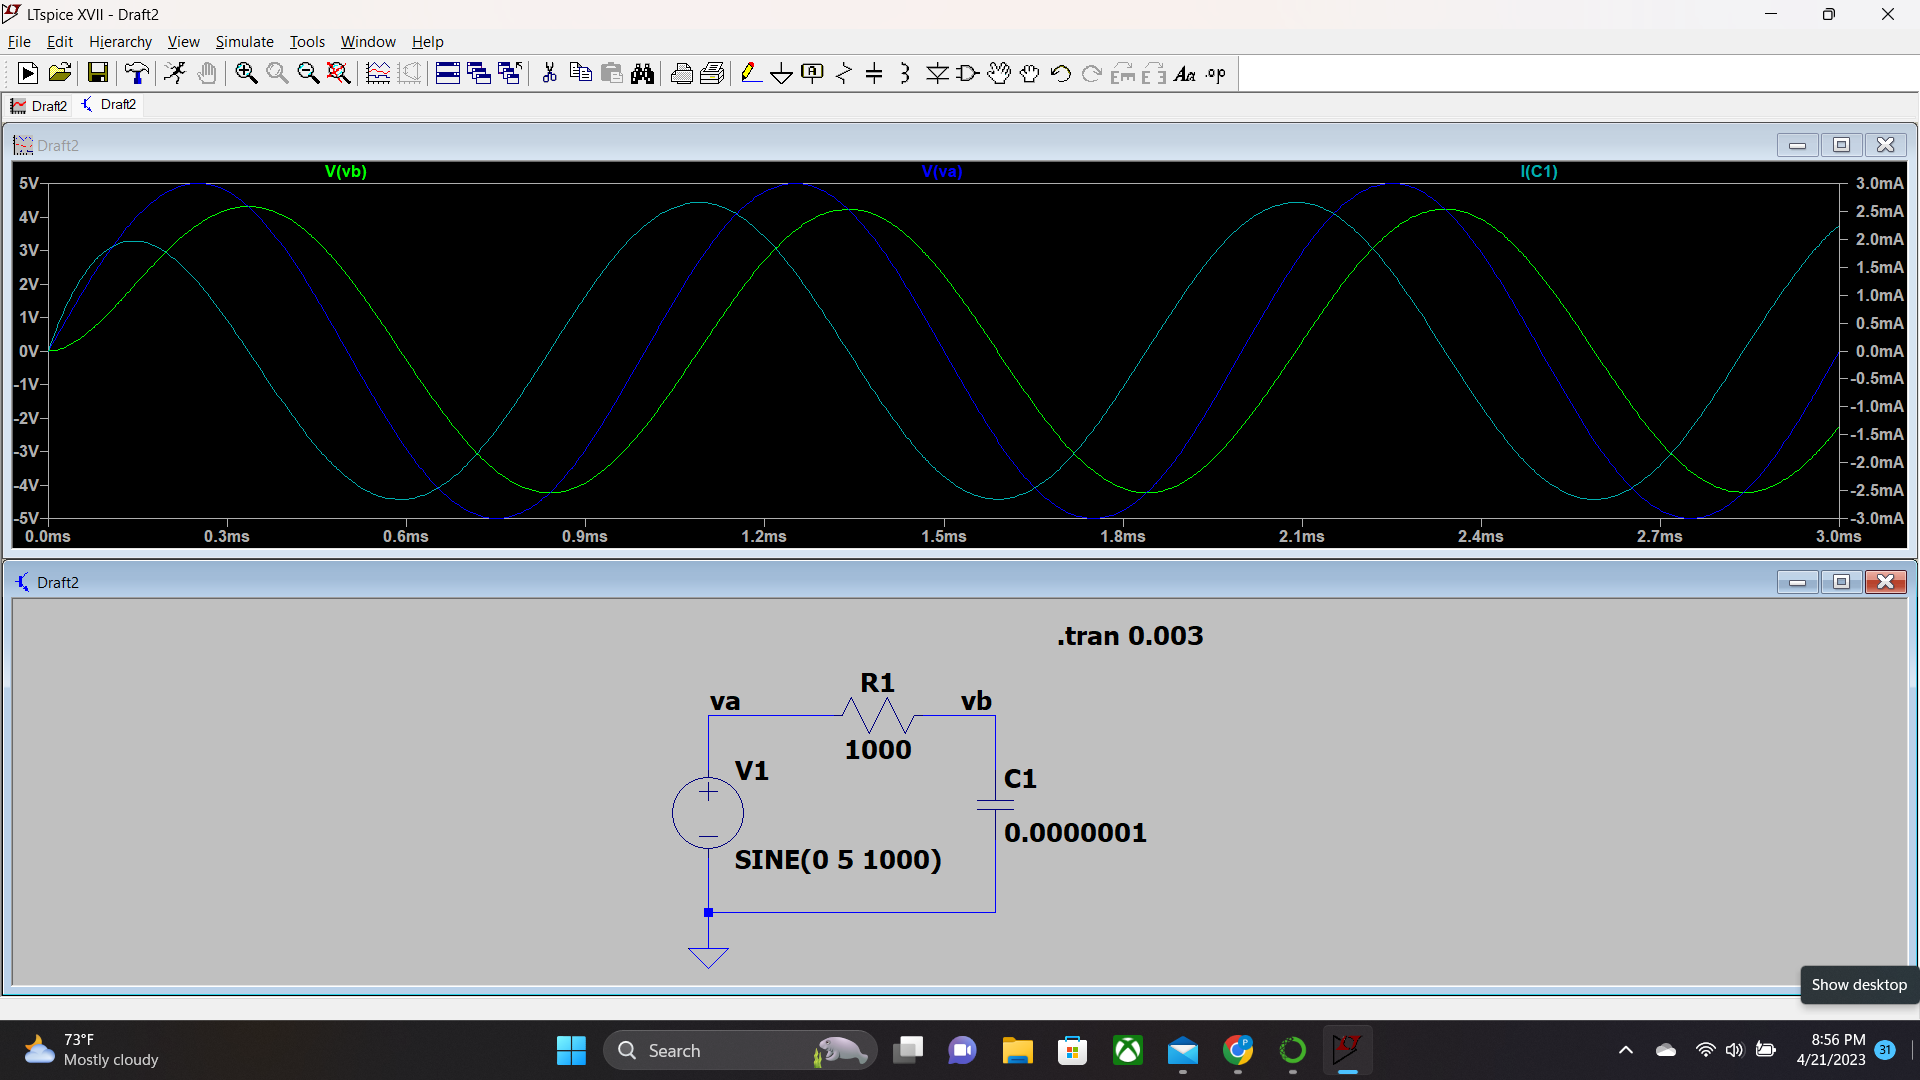

## Half Wave Rectifier

In [4]:
class half_wave_rectifier:
    def __init__(self,deltat, resistance,capacitance):
        self.deltat = deltat
        self.v_i = 0.0
        self.resistance = resistance
        self.capacitance = capacitance
        self.v_a = 0.0
        self.v_b = 0.0
        self.v_d = 0.0
        self.i_eq = 0.0
        self.i_vi = 0.0
        self.Gdeq = 0.0
        self.Iceq = 0.0
        self.Ideq = 0.0
        self.I_dt = 0.0
        self.next_Gdeq = 0.0
        self.next_Iceq = 0.0
        self.next_I_dt = 0.0
        self.next_Ideq = 0.0
        self.next_v_a = 0.0
        self.next_v_b = 0.0
        self.next_v_d = 0.0
        self.next_i_vi = 0.0
        rq = 1.0 / self.resistance
        self.a = np.array([[-self.Gdeq,self.Gdeq,1],[self.Gdeq,(-self.Gdeq)+(-rq)-(self.capacitance/self.deltat),0],[1,0,0]])
        self.b = np.array([0.0,0.0,0.0])
        
    def calc_Gdeq(self,voltage):
        self.Gdeq = 0.1e-12/0.026 * (e **(voltage/0.026) )
        
    def calc_Iceq(self,voltage):
        self.Iceq = -(self.capacitance/self.deltat)*voltage
        
    def calc_I_dt(self,voltage):
        self.I_dt = 0.1e-12 * (e**(voltage/0.026)-1)
        
    def calc_Ideq(self,voltage):
        self.Ideq = self.I_dt - (self.Gdeq*voltage)
    
    def update_matrices(self,voltage):
        self.a[0][0] = -self.Gdeq
        self.a[0][1] = self.Gdeq
        self.a[1][0] = self.Gdeq
        self.a[1][1] = (-self.Gdeq)+(-1.0/self.resistance)-(self.capacitance/self.deltat)
        self.b[0] = self.Ideq
        self.b[1] = self.Iceq - self.Ideq
        self.b[2] = voltage
        
    def update_circuit(self,voltage):
        self.next_v_a = voltage
        self.x = np.linalg.solve(self.a,self.b)
        self.next_v_a = self.x[0]
        self.next_v_b = self.x[1]
        self.next_i_vi = self.x[2]
        self.next_v_d = self.next_v_a - self.next_v_b
        self.v_d = self.v_a - self.v_b
        

In [22]:
scene = canvas()
time = 0.0 
resistance = 100000.0
capacitance = 1.0e-9
deltat = 0.000001
w = 2.0 * pi * 1000.0
rectifier = half_wave_rectifier(deltat,resistance,capacitance)
voltage = 5 * sin(w * time)
graph1 = graph(title = "R/C Circuit",ytitle = "voltage/milliamps",xtitle = "time [s]",height = 300)
g1 = gcurve(color = color.blue,label = "Vb")
g2 = gcurve(color = color.red, label = "Va")
g3 = gcurve(color = color.green, label = "IVi")
g2.plot(pos=[time,rectifier.v_a])
g1.plot(pos=[time,rectifier.v_b])
g3.plot(pos=[time,rectifier.i_vi*1000])
while (time < 0.003):
    
    rectifier.deltat = 0.000001
    time = time + rectifier.deltat
    voltage = 5.0 * sin(w * time)
    i = 5
    while (i > 0):
        rectifier.Gdeq = 0.1e-12/0.026 * (e **(rectifier.v_d/0.026) )
        rectifier.Iceq = -(rectifier.capacitance/rectifier.deltat)*rectifier.v_b
        rectifier.I_dt = 0.1e-12 * (e**(rectifier.v_d/0.026)-1)
        rectifier.Ideq = rectifier.I_dt - (rectifier.Gdeq * rectifier.v_d)
        rectifier.update_matrices(voltage)
        rectifier.update_circuit(voltage)
        if (abs((rectifier.v_d) - (rectifier.next_v_d)) <= 0.001):
            i = -1
            rectifier.v_a = rectifier.next_v_a
            rectifier.v_b = rectifier.next_v_b
            rectifier.i_vi = rectifier.next_i_vi
            g2.plot(pos=[time,rectifier.v_a])
            g1.plot(pos=[time,rectifier.v_b])
            g3.plot(pos=[time,-rectifier.i_vi*100000])
        elif ( i > 0):
            time = time - rectifier.deltat
            rectifier.deltat = rectifier.deltat/3
            time = time + rectifier.deltat
            voltage = 5 * sin(w * time)
            i -= 1
        else:
            print("Error: cannot converge!")
            time = 1

<IPython.core.display.Javascript object>

For Is I used 1e-12 amp. Resistance = 100k ohms. Capacitance = 1nf. Dt = 0.000001 sec. The simulation runs for 3 milliseconds.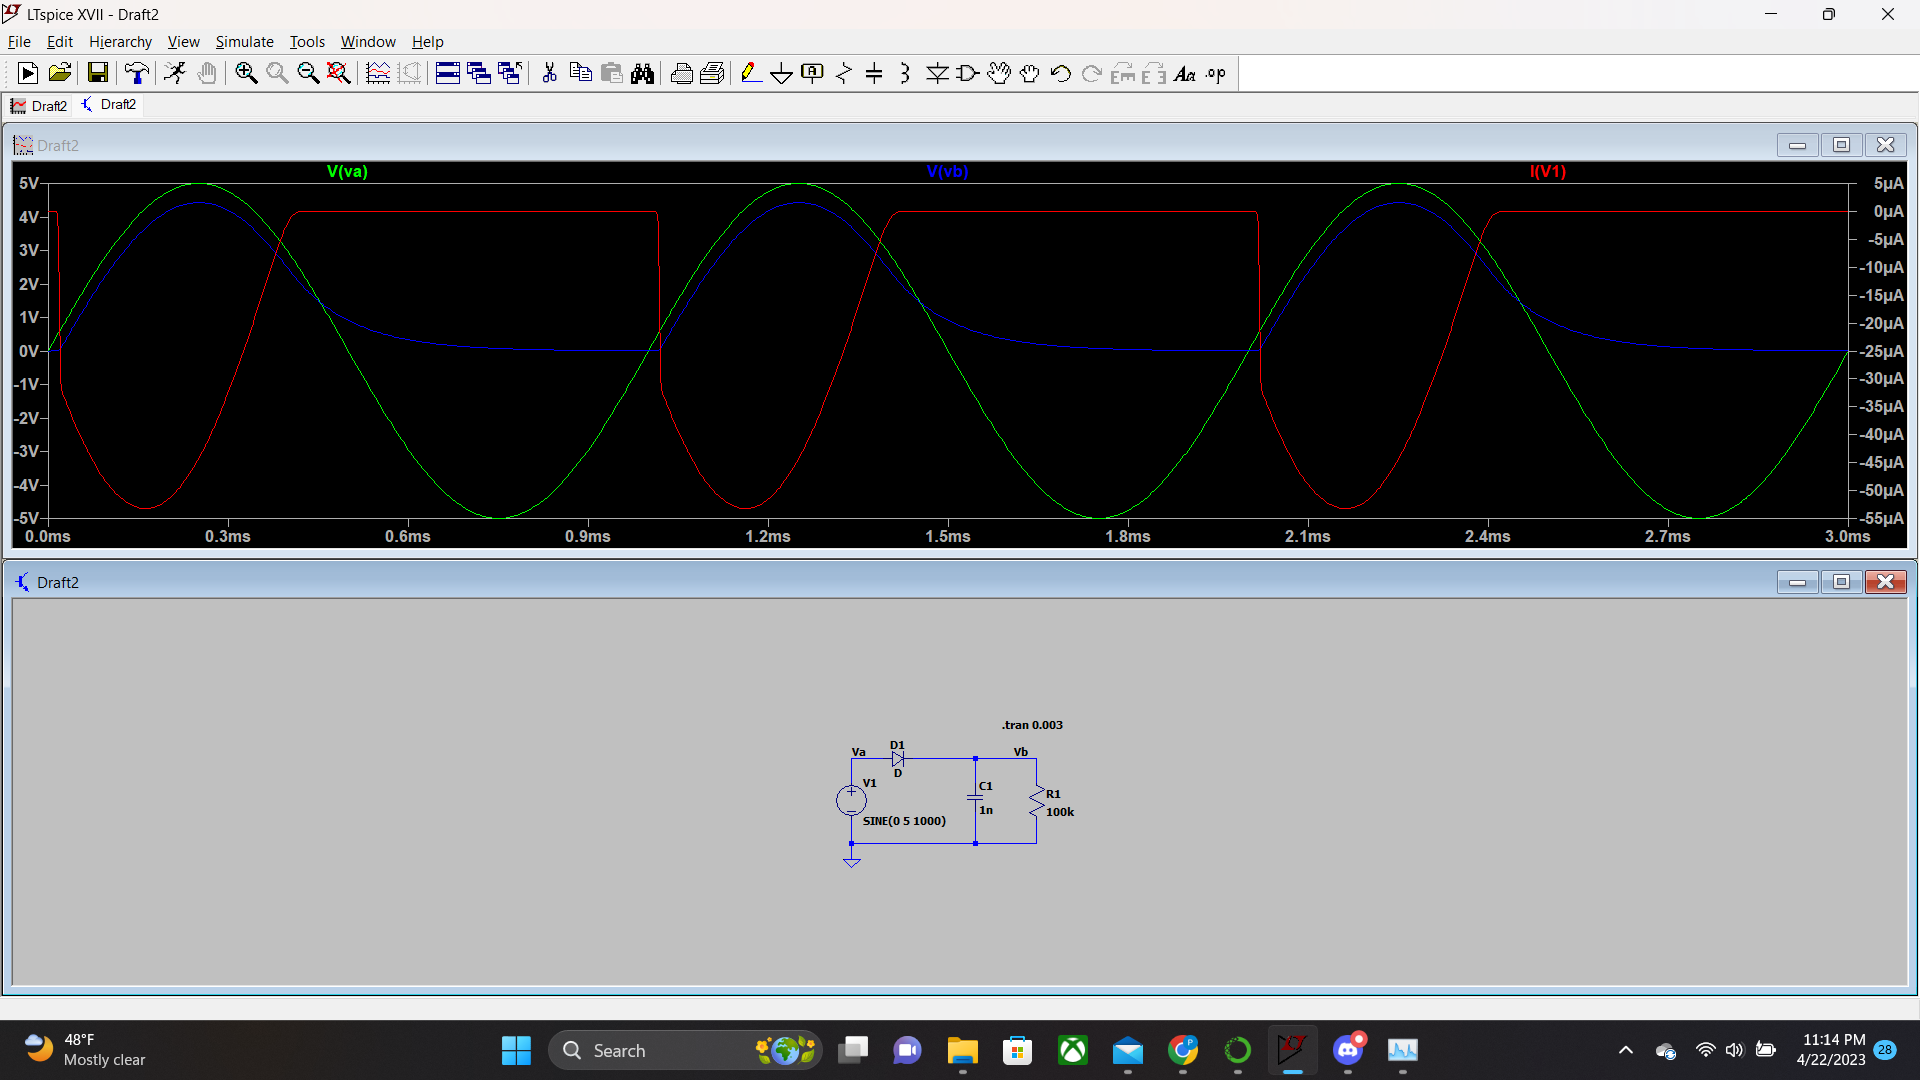

In [15]:
scene = canvas()
time = 0.0 
resistance = 1000.0
capacitance = 1.0e-12
deltat = 0.000001
w = 2.0 * pi * 1000.0
rectifier = half_wave_rectifier(deltat,resistance,capacitance)
voltage = 5 * sin(w * time)
graph1 = graph(title = "R/C Circuit",ytitle = "voltage/milliamps",xtitle = "time [s]",height = 300)
g1 = gcurve(color = color.blue,label = "Vb")
g2 = gcurve(color = color.red, label = "Va")
g3 = gcurve(color = color.green, label = "IVi")
g2.plot(pos=[time,rectifier.v_a])
g1.plot(pos=[time,rectifier.v_b])
g3.plot(pos=[time,rectifier.i_vi*1000])
while (time < 0.003):
    
    rectifier.deltat = 0.000001
    time = time + rectifier.deltat
    voltage = 5.0 * sin(w * time)
    i = 5
    while (i > 0):
        rectifier.Gdeq = 0.1e-12/0.026 * (e **(rectifier.v_d/0.026) )
        rectifier.Iceq = -(rectifier.capacitance/rectifier.deltat)*rectifier.v_b
        rectifier.I_dt = 0.1e-12 * (e**(rectifier.v_d/0.026)-1)
        rectifier.Ideq = rectifier.I_dt - (rectifier.Gdeq * rectifier.v_d)
        rectifier.update_matrices(voltage)
        rectifier.update_circuit(voltage)
        if (abs((rectifier.v_d) - (rectifier.next_v_d)) <= 0.001):
            i = -1
            rectifier.v_a = rectifier.next_v_a
            rectifier.v_b = rectifier.next_v_b
            rectifier.i_vi = rectifier.next_i_vi
            g2.plot(pos=[time,rectifier.v_a])
            g1.plot(pos=[time,rectifier.v_b])
            g3.plot(pos=[time,-rectifier.i_vi*1000])
        elif ( i > 0):
            
            time = time - rectifier.deltat
            rectifier.deltat = rectifier.deltat/3
            time = time + rectifier.deltat
            voltage = 5 * sin(w * time)
            i -= 1
        else:
            print("Error: cannot converge!")
            time = 1

<IPython.core.display.Javascript object>

By Changing the Resistance 1000 ohms. The capacitance is set to 1pf. By doing so you can see a cleaner rectification of the circuit. 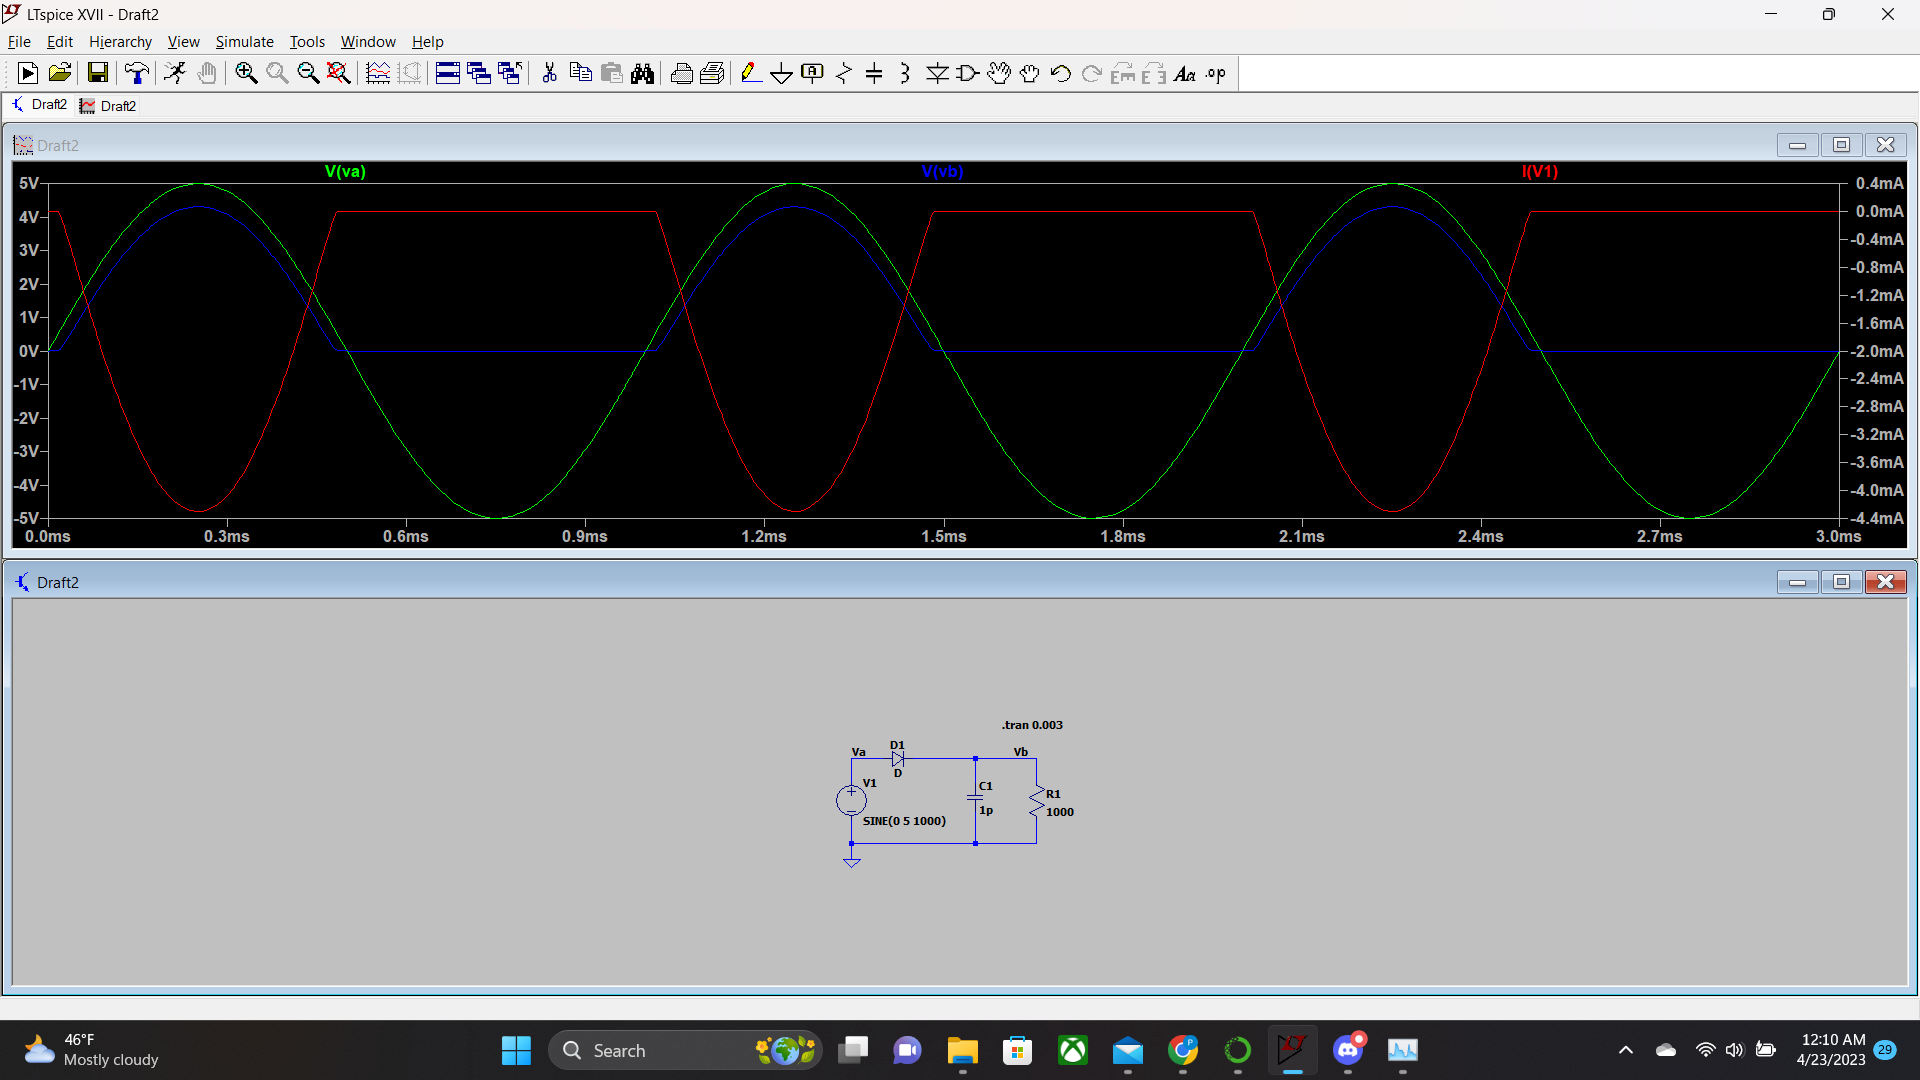

In [29]:
scene = canvas()
time = 0.0 
resistance = 10.0
capacitance = 1.0
deltat = 0.000001
w = 2.0 * pi * 1000.0
rectifier = half_wave_rectifier(deltat,resistance,capacitance)
voltage = 5 * sin(w * time)
graph1 = graph(title = "R/C Circuit",ytitle = "voltage/milliamps",xtitle = "time [s]",height = 300)
g1 = gcurve(color = color.blue,label = "Vb")
g2 = gcurve(color = color.red, label = "Va")
g3 = gcurve(color = color.green, label = "IVi")
g2.plot(pos=[time,rectifier.v_a])
g1.plot(pos=[time,rectifier.v_b])
g3.plot(pos=[time,rectifier.i_vi*1000])
while (time < 0.003):
    
    rectifier.deltat = 0.00001
    time = time + rectifier.deltat
    voltage = 5.0 * sin(w * time)
    i = 5
    while (i > 0):
        rectifier.Gdeq = 0.1e-12/0.026 * (e **(rectifier.v_d/0.026) )
        rectifier.Iceq = -(rectifier.capacitance/rectifier.deltat)*rectifier.v_b
        rectifier.I_dt = 0.1e-12 * (e**(rectifier.v_d/0.026)-1)
        rectifier.Ideq = rectifier.I_dt - (rectifier.Gdeq * rectifier.v_d)
        rectifier.update_matrices(voltage)
        rectifier.update_circuit(voltage)
        if (abs((rectifier.v_d) - (rectifier.next_v_d)) <= 0.001):
            i = -1
            rectifier.v_a = rectifier.next_v_a
            rectifier.v_b = rectifier.next_v_b
            rectifier.i_vi = rectifier.next_i_vi
            g2.plot(pos=[time,rectifier.v_a])
            g1.plot(pos=[time,rectifier.v_b])
            g3.plot(pos=[time,-rectifier.i_vi/10000])
        elif ( i > 0):
            
            time = time - rectifier.deltat
            rectifier.deltat = rectifier.deltat*0.9
            time = time + rectifier.deltat
            voltage = 5.0 * sin(w * time)
            i -= 1
            if (i == 0):
                print("Error: cannot converge!")
                time = 1
        

<IPython.core.display.Javascript object>

Error: cannot converge!


To get a circuit to not converge i set the capacitance to 1F, the resistance to 10 ohms and changed the dt to 0.00001 seconds. This created a situation where there was no chance for the circuit to converge. 